# Simple EDA for Youtube Statistics

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read CSV File

In [2]:
df = pd.read_csv("data/Global_YouTube_Statistics_Clean.csv")
df

,Unnamed: 0,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date
0,0,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0
1,1,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,17.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0
2,2,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0
3,3,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0
4,4,Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0,0.0,2015.0,May,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,986,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,125.0,5.525130e+08,138100.0,2200000.0,1700000.0,26500000.0,700000.0,2017.0,Feb,12.0
987,987,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,84.0,6.473500e+07,16200.0,258900.0,194200.0,3100000.0,300000.0,2018.0,Sep,14.0
988,988,Panda,12300000,2.214684e+09,Others,HybridPanda,2452,United Kingdom,GB,Games,...,79.0,6.703500e+04,17.0,268.0,201.0,3200.0,1000.0,2006.0,Sep,11.0
989,989,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,94.0,3.871000e+06,968.0,15500.0,11600.0,185800.0,100000.0,2012.0,May,9.0


#### Seeing info values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        991 non-null    int64  
 1   Youtuber                          991 non-null    object 
 2   subscribers                       991 non-null    int64  
 3   video views                       991 non-null    float64
 4   category                          991 non-null    object 
 5   Title                             991 non-null    object 
 6   uploads                           991 non-null    int64  
 7   Country                           991 non-null    object 
 8   Abbreviation                      991 non-null    object 
 9   channel_type                      991 non-null    object 
 10  video_views_rank                  991 non-null    float64
 11  country_rank                      991 non-null    float64
 12  channel_

#### Import Libraries for graphing

In [4]:
import seaborn as sns

#### Top 5 Youtuber from video view

In [5]:
top_5_youtuber_video_view = df[df["video_views_rank"]<6].sort_values(by="video_views_rank", ascending=True)[["Youtuber", "video views"]]
top_5_youtuber_video_view

,Youtuber,video views
0,T-Series,2.280000e+11
2,Cocomelon - Nursery Rhymes,1.640000e+11
3,SET India,1.480000e+11
12,Sony SAB,1.010000e+11
4,Kids Diana Show,9.324704e+10


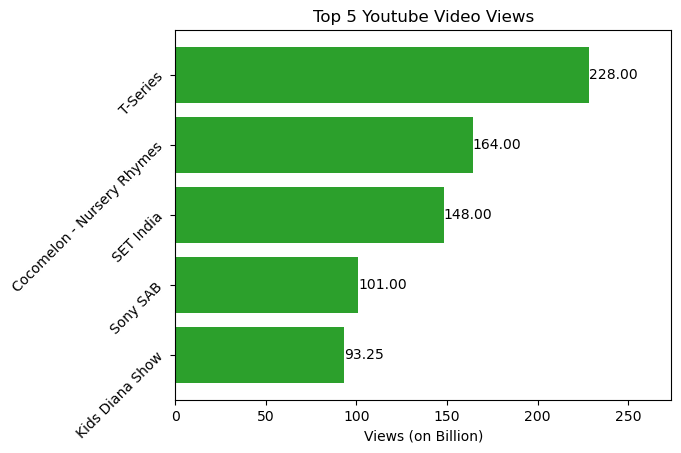

In [6]:
fig, ax = plt.subplots()
y_pos = np.arange(len(top_5_youtuber_video_view["Youtuber"]))


hbar = ax.barh(y_pos, top_5_youtuber_video_view["video views"]/1e+9, align='center', color='tab:green')
ax.set_yticks(y_pos, labels=top_5_youtuber_video_view["Youtuber"], rotation=45)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Views (on Billion)')


ax.bar_label(hbar, fmt='%.2f')
ax.set_xlim(left=None, right=max(top_5_youtuber_video_view["video views"]/1e+9)*1.2)
ax.set_title('Top 5 Youtube Video Views')

plt.show()

#### Top 5 Youtuber from Subscribers

In [7]:
top_5_youtuber_subscribers = df[["Youtuber", "subscribers"]].sort_values(by="subscribers", ascending=False).head(5)
top_5_youtuber_subscribers

,Youtuber,subscribers
0,T-Series,245000000
1,MrBeast,166000000
2,Cocomelon - Nursery Rhymes,162000000
3,SET India,159000000
4,Kids Diana Show,112000000


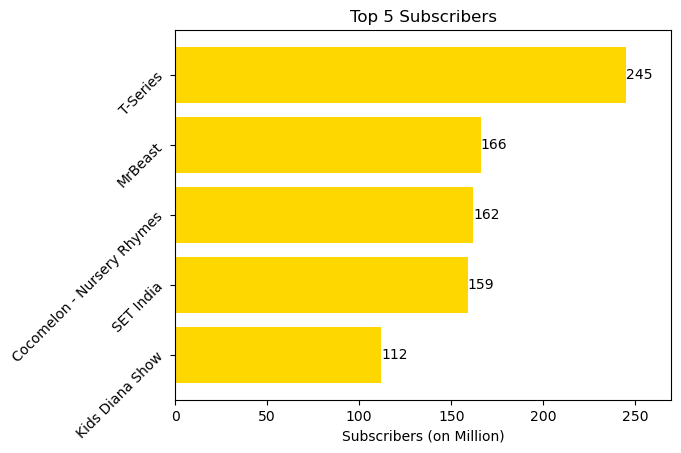

In [8]:
fig, ax = plt.subplots()
y_pos = np.arange(len(top_5_youtuber_subscribers["Youtuber"]))


hbar = ax.barh(y_pos, top_5_youtuber_subscribers["subscribers"]/1e+6, align='center', color='gold')
ax.set_yticks(y_pos, labels=top_5_youtuber_subscribers["Youtuber"], rotation=45)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Subscribers (on Million)')


ax.bar_label(hbar, fmt='%.0f')
ax.set_xlim(left=None, right=max(top_5_youtuber_subscribers["subscribers"]/1e+6)*1.1)
ax.set_title('Top 5 Subscribers')

plt.show()

#### Top 5 Category Video

In [11]:
top_5_category_video = df["category"].value_counts().head(5)
top_5_category_video

Entertainment     241
Music             202
People & Blogs    132
Gaming             94
Comedy             69
Name: category, dtype: int64

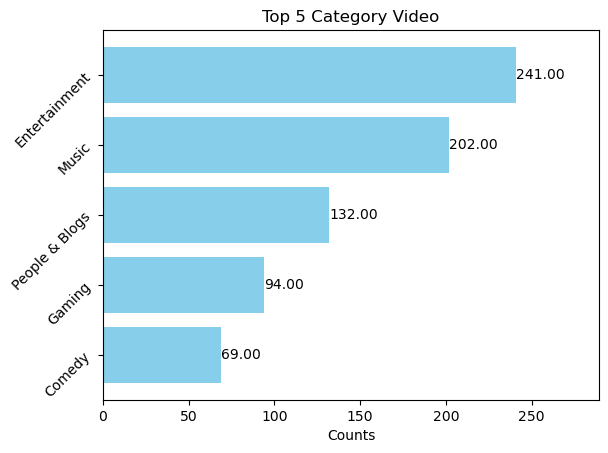

In [14]:
fig, ax = plt.subplots()
y_pos = np.arange(len(top_5_category_video))


hbar = ax.barh(y_pos, top_5_category_video, align='center', color='skyblue')
ax.set_yticks(y_pos, labels=top_5_category_video.index, rotation=45)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Counts')


ax.bar_label(hbar, fmt='%.2f')
ax.set_xlim(left=None, right=max(top_5_category_video)*1.2)
ax.set_title('Top 5 Category Video')

plt.show()

#### Top 5 Country

In [16]:
top_5_Country = df["Country"].value_counts().head(5)
top_5_Country

United States     312
India             168
Others            119
Brazil             62
United Kingdom     43
Name: Country, dtype: int64

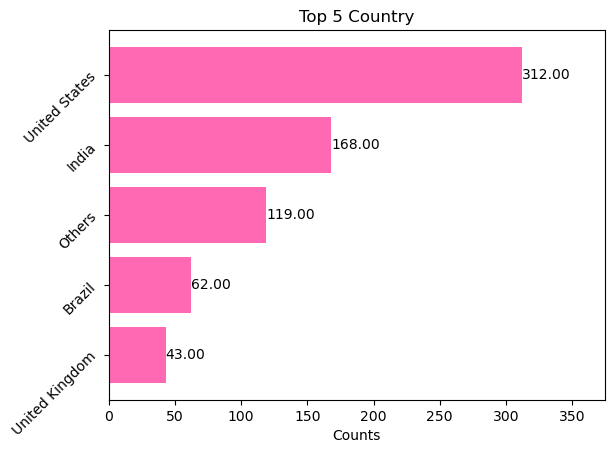

In [19]:
fig, ax = plt.subplots()
y_pos = np.arange(len(top_5_Country))


hbar = ax.barh(y_pos, top_5_Country, align='center', color='hotpink')
ax.set_yticks(y_pos, labels=top_5_Country.index, rotation=45)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Counts')


ax.bar_label(hbar, fmt='%.2f')
ax.set_xlim(left=None, right=max(top_5_Country)*1.2)
ax.set_title('Top 5 Country')

plt.show()